In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

# Building an Image Classifier Using the Sequential API

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.5.0'

In [4]:
keras.__version__

'2.5.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
# Creating the model
model = keras.models.Sequential()
model.add( keras.layers.Flatten(input_shape=[28, 28]) )
model.add( keras.layers.Dense(300, activation="relu") )
model.add( keras.layers.Dense(100, activation="relu") )
model.add( keras.layers.Dense(10, activation="softmax") )

In [12]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


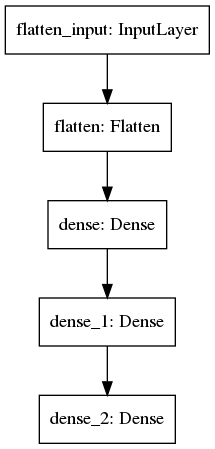

In [14]:
keras.utils.plot_model(model)

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.00504383,  0.03089502,  0.03925049, ...,  0.07354715,
        -0.06503018,  0.05785705],
       [-0.03532572, -0.04798091, -0.0359191 , ...,  0.02360683,
         0.04053905,  0.04662654],
       [ 0.06098068,  0.04713886, -0.03005064, ..., -0.07223127,
         0.04426917,  0.009569  ],
       ...,
       [ 0.00017989,  0.03226771, -0.00845888, ..., -0.06969996,
        -0.0736379 , -0.0481874 ],
       [ 0.03212049, -0.05364925,  0.04954335, ...,  0.06126158,
        -0.07334411, -0.04166356],
       [-0.057715  , -0.03283969,  0.04380745, ..., -0.03426767,
        -0.01043206,  0.01762548]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 25s 13ms/step - loss: 0.7197 - accuracy: 0.7642 - val_loss: 0.5343 - val_accuracy: 0.8108
Epoch 2/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.4878 - accuracy: 0.8302 - val_loss: 0.4371 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 23s 14ms/step - loss: 0.4426 - accuracy: 0.8444 - val_loss: 0.4164 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4160 - accuracy: 0.8536 - val_loss: 0.3937 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3956 - accuracy: 0.8618 - val_loss: 0.3979 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3797 - accuracy: 0.8653 - val_loss: 0.3734 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3654 - accuracy: 0.8717 - val_loss: 0.3830 -

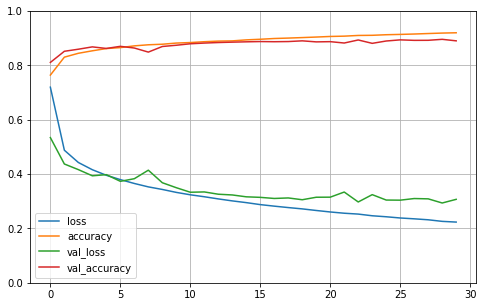

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.3404 - accuracy: 0.8777


[0.3404337465763092, 0.8776999711990356]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 7s 16ms/step - loss: 1.3942 - val_loss: 0.6224
Epoch 2/20
363/363 [==============================] - 5s 15ms/step - loss: 0.5311 - val_loss: 0.4382
Epoch 3/20
363/363 [==============================] - 6s 16ms/step - loss: 0.4357 - val_loss: 0.4020
Epoch 4/20
363/363 [==============================] - 6s 17ms/step - loss: 0.4066 - val_loss: 0.3866
Epoch 5/20
363/363 [==============================] - 6s 17ms/step - loss: 0.3948 - val_loss: 0.3788
Epoch 6/20
363/363 [==============================] - 6s 15ms/step - loss: 0.4206 - val_loss: 0.3785
Epoch 7/20
363/363 [==============================] - 5s 14ms/step - loss: 0.3873 - val_loss: 0.3806
Epoch 8/20
363/363 [==============================] - 5s 15ms/step - loss: 0.3816 - val_loss: 0.3688
Epoch 9/20
363/363 [==============================] - 5s 14ms/step - loss: 0.3815 - val_loss: 0.3636
Epoch 10/20
363/363 [==============================] - 4s 12ms/step - loss: 0.3787 - val_lo

In [34]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # Pretend these are new instances
y_pred = model.predict(X_new)
print(y_pred)

162/162 [==============================] - 1s 6ms/step - loss: 0.3430
[[2.716395 ]
 [1.2120693]
 [1.97083  ]]


# Building Complex Models Using the Functional API

In [35]:
# 1 input, 1 output, wide & deep, using functional API
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2]) # Upper case "C"
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [36]:
# 2 inputs, 1 output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # Lower case "c"
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [37]:
# 2 inputs, 1 output
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit( (X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=( (X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate( (X_test_A, X_test_B), y_test)
y_pred = model.predict( (X_new_A, X_new_B) )

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 6s 13ms/step - loss: 2.7198 - val_loss: 1.0281
Epoch 2/20
363/363 [==============================] - 5s 14ms/step - loss: 0.8213 - val_loss: 0.6864
Epoch 3/20
363/363 [==============================] - 5s 14ms/step - loss: 0.6596 - val_loss: 0.6152
Epoch 4/20
363/363 [==============================] - 5s 14ms/step - loss: 0.6139 - val_loss: 0.5880
Epoch 5/20
363/363 [==============================] - 6s 15ms/step - loss: 0.5908 - val_loss: 0.5660
Epoch 6/20
363/363 [==============================] - 5s 13ms/step - loss: 0.5745 - val_loss: 0.5506
Epoch 7/20
363/363 [==============================] - 5s 14ms/step - loss: 0.5616 - val_loss: 0.5432
Epoch 8/20
363/363 [==============================] - 5s 13ms/step - loss: 0.5507 - val_loss: 0.5318
Epoch 9/20
363/363 [==============================] - 5s 13ms/step - loss: 0.5406 - val_loss: 0.5193
Epoch 10/20
363/363 [==============================] - 5s 14ms/step - loss: 0.5325 - val_lo

In [38]:
y_pred

array([[2.652466 ],
       [1.5765576],
       [2.546391 ]], dtype=float32)

In [39]:
# 2 inputs, 2 output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # Lower case "c"
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [40]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [41]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 6s 14ms/step - loss: 1.0372 - output_loss: 0.9400 - aux_output_loss: 1.9119 - val_loss: 0.6201 - val_output_loss: 0.5443 - val_aux_output_loss: 1.3028
Epoch 2/20
363/363 [==============================] - 5s 14ms/step - loss: 0.6354 - output_loss: 0.5838 - aux_output_loss: 1.1003 - val_loss: 0.5292 - val_output_loss: 0.4806 - val_aux_output_loss: 0.9669
Epoch 3/20
363/363 [==============================] - 5s 14ms/step - loss: 0.5197 - output_loss: 0.4800 - aux_output_loss: 0.8766 - val_loss: 0.5043 - val_output_loss: 0.4689 - val_aux_output_loss: 0.8231
Epoch 4/20
363/363 [==============================] - 5s 13ms/step - loss: 0.4923 - output_loss: 0.4611 - aux_output_loss: 0.7729 - val_loss: 0.4668 - val_output_loss: 0.4378 - val_aux_output_loss: 0.7283
Epoch 5/20
363/363 [==============================] - 5s 14ms/step - loss: 0.4712 - output_loss: 0.4448 - aux_output_loss: 0.7091 - val_loss: 0.4586 - val_output_loss: 0.4335 - val

In [42]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)
print(total_loss, main_loss, aux_loss)

162/162 [==============================] - 2s 11ms/step - loss: 0.3686 - output_loss: 0.3563 - aux_output_loss: 0.4793
0.3686233162879944 0.356326699256897 0.4792928099632263


In [43]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main)
print(y_pred_aux)

[[2.4348474]
 [1.4645929]
 [1.727926 ]]
[[2.2469833]
 [2.091738 ]
 [1.3562803]]


## Using the Subclassing API to Build Dynamic Models

In [44]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs # a tuple
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model_dynamic = WideAndDeepModel()

## Saving and Restoring a Model

In [45]:
# model = keras.Model([...])
# model.compile([...])
# model.fit([...])
model.save("my_keras_model_wide_deep_2in_2out.h5")

In [46]:
model = keras.models.load_model("my_keras_model_wide_deep_2in_2out.h5")

## Using Callbacks

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_wide_deep_2in_2out.h5")
history = model.fit( [X_train_A, X_train_B], [y_train, y_train], epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 6s 13ms/step - loss: 0.3620 - output_loss: 0.3494 - aux_output_loss: 0.4759
Epoch 2/10
363/363 [==============================] - 5s 15ms/step - loss: 0.3606 - output_loss: 0.3480 - aux_output_loss: 0.4741
Epoch 3/10
363/363 [==============================] - 5s 14ms/step - loss: 0.3611 - output_loss: 0.3494 - aux_output_loss: 0.4669
Epoch 4/10
363/363 [==============================] - 5s 14ms/step - loss: 0.3568 - output_loss: 0.3451 - aux_output_loss: 0.4622
Epoch 5/10
363/363 [==============================] - 5s 14ms/step - loss: 0.3532 - output_loss: 0.3415 - aux_output_loss: 0.4580
Epoch 6/10
363/363 [==============================] - 7s 18ms/step - loss: 0.3542 - output_loss: 0.3430 - aux_output_loss: 0.4546
Epoch 7/10
363/363 [==============================] - 5s 15ms/step - loss: 0.3524 - output_loss: 0.3413 - aux_output_loss: 0.4523
Epoch 8/10
363/363 [==============================] - 4s 12ms/step - loss: 0.3508 - output

In [48]:
ckeckpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_wide_deep_2in_2out.h5", 
                                                save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model_wide_deep_2in_2out.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 5s 13ms/step - loss: 0.3452 - output_loss: 0.3345 - aux_output_loss: 0.4410 - val_loss: 0.3405 - val_output_loss: 0.3299 - val_aux_output_loss: 0.4365
Epoch 2/10
363/363 [==============================] - 5s 13ms/step - loss: 0.3442 - output_loss: 0.3338 - aux_output_loss: 0.4377 - val_loss: 0.3472 - val_output_loss: 0.3369 - val_aux_output_loss: 0.4397
Epoch 3/10
363/363 [==============================] - 5s 13ms/step - loss: 0.3432 - output_loss: 0.3330 - aux_output_loss: 0.4351 - val_loss: 0.3367 - val_output_loss: 0.3262 - val_aux_output_loss: 0.4308
Epoch 4/10
363/363 [==============================] - 5s 12ms/step - loss: 0.3479 - output_loss: 0.3380 - aux_output_loss: 0.4366 - val_loss: 0.3400 - val_output_loss: 0.3298 - val_aux_output_loss: 0.4316
Epoch 5/10
363/363 [==============================] - 4s 12ms/step - loss: 0.3428 - output_loss: 0.3327 - aux_output_loss: 0.4340 - val_loss: 0.3338 - val_output_loss: 0.3236 - val

In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3375 - output_loss: 0.3282 - aux_output_loss: 0.4214 - val_loss: 0.3360 - val_output_loss: 0.3267 - val_aux_output_loss: 0.4197
Epoch 2/100
363/363 [==============================] - 5s 12ms/step - loss: 0.3374 - output_loss: 0.3283 - aux_output_loss: 0.4201 - val_loss: 0.3324 - val_output_loss: 0.3234 - val_aux_output_loss: 0.4133
Epoch 3/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3366 - output_loss: 0.3275 - aux_output_loss: 0.4182 - val_loss: 0.3248 - val_output_loss: 0.3155 - val_aux_output_loss: 0.4092
Epoch 4/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3378 - output_loss: 0.3291 - aux_output_loss: 0.4168 - val_loss: 0.3321 - val_output_loss: 0.3221 - val_aux_output_loss: 0.4220
Epoch 5/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3367 - output_loss: 0.3279 - aux_output_loss: 0.4158 - val_loss: 0.3312 - val_output_loss: 0.3216 

Epoch 41/100
363/363 [==============================] - 4s 12ms/step - loss: 0.3221 - output_loss: 0.3149 - aux_output_loss: 0.3875 - val_loss: 0.3164 - val_output_loss: 0.3087 - val_aux_output_loss: 0.3855
Epoch 42/100
363/363 [==============================] - 4s 12ms/step - loss: 0.3212 - output_loss: 0.3138 - aux_output_loss: 0.3878 - val_loss: 0.3238 - val_output_loss: 0.3167 - val_aux_output_loss: 0.3869
Epoch 43/100
363/363 [==============================] - 4s 12ms/step - loss: 0.3210 - output_loss: 0.3137 - aux_output_loss: 0.3867 - val_loss: 0.3147 - val_output_loss: 0.3076 - val_aux_output_loss: 0.3789
Epoch 44/100
363/363 [==============================] - 4s 12ms/step - loss: 0.3207 - output_loss: 0.3134 - aux_output_loss: 0.3863 - val_loss: 0.3161 - val_output_loss: 0.3092 - val_aux_output_loss: 0.3781
Epoch 45/100
363/363 [==============================] - 5s 14ms/step - loss: 0.3212 - output_loss: 0.3141 - aux_output_loss: 0.3852 - val_loss: 0.3213 - val_output_loss: 0.

In [50]:
# Custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
print_val_train_ratio_cb = PrintValTrainRatioCallback()

In [51]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                   callbacks=[checkpoint_cb, print_val_train_ratio_cb])

Epoch 1/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3146 - output_loss: 0.3076 - aux_output_loss: 0.3775 - val_loss: 0.3089 - val_output_loss: 0.3023 - val_aux_output_loss: 0.3680

val/train: 0.98
Epoch 2/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3136 - output_loss: 0.3067 - aux_output_loss: 0.3763 - val_loss: 0.3120 - val_output_loss: 0.3052 - val_aux_output_loss: 0.3733

val/train: 0.99
Epoch 3/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3148 - output_loss: 0.3080 - aux_output_loss: 0.3760 - val_loss: 0.3122 - val_output_loss: 0.3057 - val_aux_output_loss: 0.3705

val/train: 0.99
Epoch 4/10
363/363 [==============================] - 3s 8ms/step - loss: 0.3151 - output_loss: 0.3082 - aux_output_loss: 0.3771 - val_loss: 0.3102 - val_output_loss: 0.3032 - val_aux_output_loss: 0.3729

val/train: 0.98
Epoch 5/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3138 - output_loss: 0.3069 - aux_output_

## Using TensorBoard for Visualization

In [52]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., "./my_logs/run_2019_06_07-15_15_22"
print(run_logdir)

./my_logs/run_2021_08_13-09_56_36


In [61]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                   callbacks=[tensorboard_cb])

Epoch 1/10
363/363 [==============================] - 4s 10ms/step - loss: 0.3115 - output_loss: 0.3048 - aux_output_loss: 0.3715 - val_loss: 0.3107 - val_output_loss: 0.3041 - val_aux_output_loss: 0.3704
Epoch 2/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3110 - output_loss: 0.3043 - aux_output_loss: 0.3706 - val_loss: 0.3227 - val_output_loss: 0.3179 - val_aux_output_loss: 0.3658
Epoch 3/10
363/363 [==============================] - 4s 11ms/step - loss: 0.3116 - output_loss: 0.3051 - aux_output_loss: 0.3695 - val_loss: 0.3053 - val_output_loss: 0.2984 - val_aux_output_loss: 0.3670
Epoch 4/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3133 - output_loss: 0.3068 - aux_output_loss: 0.3715 - val_loss: 0.3470 - val_output_loss: 0.3430 - val_aux_output_loss: 0.3832
Epoch 5/10
363/363 [==============================] - 3s 8ms/step - loss: 0.3138 - output_loss: 0.3069 - aux_output_loss: 0.3758 - val_loss: 0.3676 - val_output_loss: 0.3662 - val_au

In [54]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 105037), started 2 days, 0:28:01 ago. (Use '!kill 105037' to kill it.)

In [62]:
# Customized logs
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [63]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [64]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [67]:
keras_reg.fit(X_train, y_train, epochs=10,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test[0:3,:])

Epoch 1/10
363/363 [==============================] - 4s 8ms/step - loss: 1.5218 - val_loss: 0.6805
Epoch 2/10
363/363 [==============================] - 6s 16ms/step - loss: 0.7082 - val_loss: 0.6192
Epoch 3/10
363/363 [==============================] - 6s 17ms/step - loss: 0.6032 - val_loss: 0.5687
Epoch 4/10
363/363 [==============================] - 6s 16ms/step - loss: 0.5616 - val_loss: 0.5320
Epoch 5/10
363/363 [==============================] - 6s 18ms/step - loss: 0.5374 - val_loss: 0.5099
Epoch 6/10
363/363 [==============================] - 6s 18ms/step - loss: 0.5134 - val_loss: 0.4898
Epoch 7/10
363/363 [==============================] - 6s 16ms/step - loss: 0.4976 - val_loss: 0.4776
Epoch 8/10
363/363 [==============================] - 6s 18ms/step - loss: 0.4877 - val_loss: 0.4645
Epoch 9/10
363/363 [==============================] - 6s 16ms/step - loss: 0.4772 - val_loss: 0.4539
Epoch 10/10
162/162 [==============================] - 2s 9ms/step - loss: 0.4394


In [70]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=5,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 14s 52ms/step - loss: 2.6748 - val_loss: 1.1190
Epoch 2/5
242/242 [==============================] - 6s 26ms/step - loss: 0.8798 - val_loss: 0.7583
Epoch 3/5
242/242 [==============================] - 6s 24ms/step - loss: 0.7197 - val_loss: 0.6916
Epoch 4/5
242/242 [==============================] - 6s 26ms/step - loss: 0.6823 - val_loss: 0.6591
Epoch 5/5
121/121 [==============================] - 2s 14ms/step - loss: 0.6738


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 27ms/step - loss: 2.4990 - val_loss: 1.1089
Epoch 2/5
242/242 [==============================] - 6s 26ms/step - loss: 0.8687 - val_loss: 0.7583
Epoch 3/5
242/242 [==============================] - 8s 35ms/step - loss: 0.7348 - val_loss: 0.6874
Epoch 4/5
242/242 [==============================] - 8s 35ms/step - loss: 0.6952 - val_loss: 0.6565
Epoch 5/5
121/121 [==============================] - 2s 14ms/step - loss: 0.6463


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 28ms/step - loss: 2.8603 - val_loss: 1.3907
Epoch 2/5
242/242 [==============================] - 7s 31ms/step - loss: 1.0509 - val_loss: 0.8665
Epoch 3/5
242/242 [==============================] - 7s 29ms/step - loss: 0.8064 - val_loss: 0.7588
Epoch 4/5
242/242 [==============================] - 7s 28ms/step - loss: 0.7434 - val_loss: 0.7192
Epoch 5/5
121/121 [==============================] - 2s 15ms/step - loss: 0.7080


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 9s 35ms/step - loss: 2.2894 - val_loss: 0.9753
Epoch 2/5
242/242 [==============================] - 7s 30ms/step - loss: 0.8726 - val_loss: 0.7781
Epoch 3/5
242/242 [==============================] - 7s 30ms/step - loss: 0.7666 - val_loss: 0.7242
Epoch 4/5
242/242 [==============================] - 7s 30ms/step - loss: 0.7212 - val_loss: 0.6884
Epoch 5/5
121/121 [==============================] - 1s 10ms/step - loss: 0.7086


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 31ms/step - loss: 2.9852 - val_loss: 1.3677
Epoch 2/5
242/242 [==============================] - 7s 31ms/step - loss: 1.0205 - val_loss: 0.8747
Epoch 3/5
242/242 [==============================] - 7s 31ms/step - loss: 0.7869 - val_loss: 0.7522
Epoch 4/5
242/242 [==============================] - 12s 49ms/step - loss: 0.7112 - val_loss: 0.7017
Epoch 5/5
121/121 [==============================] - 2s 15ms/step - loss: 0.6369


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 30ms/step - loss: 2.3801 - val_loss: 1.2529
Epoch 2/5
242/242 [==============================] - 7s 29ms/step - loss: 1.0347 - val_loss: 0.9304
Epoch 3/5
242/242 [==============================] - 7s 30ms/step - loss: 0.8449 - val_loss: 0.8057
Epoch 4/5
242/242 [==============================] - 7s 28ms/step - loss: 0.7752 - val_loss: 0.7528
Epoch 5/5
121/121 [==============================] - 2s 15ms/step - loss: 0.7232


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 28ms/step - loss: 0.9466 - val_loss: 0.4692
Epoch 2/5
242/242 [==============================] - 6s 26ms/step - loss: 0.4451 - val_loss: 0.4262
Epoch 3/5
242/242 [==============================] - 6s 25ms/step - loss: 0.4152 - val_loss: 0.3953
Epoch 4/5
242/242 [==============================] - 6s 25ms/step - loss: 0.3994 - val_loss: 0.4035
Epoch 5/5
121/121 [==============================] - 2s 14ms/step - loss: 0.4231


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 7s 26ms/step - loss: 0.6554 - val_loss: 0.4771
Epoch 2/5
242/242 [==============================] - 6s 26ms/step - loss: 0.4504 - val_loss: 0.4082
Epoch 3/5
242/242 [==============================] - 6s 27ms/step - loss: 0.4161 - val_loss: 0.4185
Epoch 4/5
242/242 [==============================] - 6s 27ms/step - loss: 0.4051 - val_loss: 0.3796
Epoch 5/5
121/121 [==============================] - 2s 13ms/step - loss: 0.3853


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 28ms/step - loss: 0.7702 - val_loss: 0.4792
Epoch 2/5
242/242 [==============================] - 6s 26ms/step - loss: 1.8533 - val_loss: 1.1632
Epoch 3/5
242/242 [==============================] - 6s 24ms/step - loss: 0.6585 - val_loss: 0.5579
Epoch 4/5
242/242 [==============================] - 6s 24ms/step - loss: 0.5121 - val_loss: 0.4745
Epoch 5/5
121/121 [==============================] - 2s 13ms/step - loss: 0.4499


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 7s 24ms/step - loss: 0.9744 - val_loss: 0.6284
Epoch 2/5
242/242 [==============================] - 6s 25ms/step - loss: 0.7677 - val_loss: 0.5942
Epoch 3/5
242/242 [==============================] - 6s 23ms/step - loss: 0.7328 - val_loss: 0.5041
Epoch 4/5
242/242 [==============================] - 6s 24ms/step - loss: 0.4936 - val_loss: 0.4665
Epoch 5/5
121/121 [==============================] - 2s 13ms/step - loss: 0.4572


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 7s 24ms/step - loss: 1.2799 - val_loss: 0.5836
Epoch 2/5
242/242 [==============================] - 6s 24ms/step - loss: 0.5606 - val_loss: 0.4882
Epoch 3/5
242/242 [==============================] - 6s 26ms/step - loss: 0.4949 - val_loss: 0.4517
Epoch 4/5
242/242 [==============================] - 6s 26ms/step - loss: 0.4670 - val_loss: 0.4267
Epoch 5/5
121/121 [==============================] - 1s 11ms/step - loss: 0.4163


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 8s 29ms/step - loss: 1.1056 - val_loss: 0.5882
Epoch 2/5
242/242 [==============================] - 6s 24ms/step - loss: 0.7551 - val_loss: 0.5723
Epoch 3/5
242/242 [==============================] - 6s 23ms/step - loss: 0.5669 - val_loss: 0.4943
Epoch 4/5
242/242 [==============================] - 6s 26ms/step - loss: 0.4872 - val_loss: 0.4560
Epoch 5/5
121/121 [==============================] - 2s 17ms/step - loss: 0.4661


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 9s 33ms/step - loss: 3.1571 - val_loss: 2.1461TA: 1s - loss: 3.357 - E
Epoch 2/5
242/242 [==============================] - 8s 32ms/step - loss: 1.6306 - val_loss: 1.3089
Epoch 3/5
242/242 [==============================] - 7s 31ms/step - loss: 1.0990 - val_loss: 0.9846
Epoch 4/5
242/242 [==============================] - 7s 28ms/step - loss: 0.8862 - val_loss: 0.8300
Epoch 5/5
121/121 [==============================] - 3s 28ms/step - loss: 0.7648


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 11s 38ms/step - loss: 3.4501 - val_loss: 1.7368
Epoch 2/5
242/242 [==============================] - 6s 26ms/step - loss: 1.4048 - val_loss: 1.0682
Epoch 3/5
242/242 [==============================] - 6s 26ms/step - loss: 0.9534 - val_loss: 0.8657
Epoch 4/5
242/242 [==============================] - 5s 22ms/step - loss: 0.8259 - val_loss: 0.7755
Epoch 5/5
121/121 [==============================] - 1s 11ms/step - loss: 0.7362


/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
242/242 [==============================] - 6s 22ms/step - loss: 3.1314 - val_loss: 1.8524
Epoch 2/5
242/242 [==============================] - 6s 23ms/step - loss: 1.4491 - val_loss: 1.1084
Epoch 3/5
242/242 [==============================] - 6s 25ms/step - loss: 0.9759 - val_loss: 0.8451
Epoch 4/5
242/242 [==============================] - 6s 23ms/step - loss: 0.7978 - val_loss: 0.7404
Epoch 5/5
121/121 [==============================] - 1s 11ms/step - loss: 0.7148
Epoch 1/5
363/363 [==============================] - 9s 22ms/step - loss: 0.6500 - val_loss: 0.4977
Epoch 2/5
363/363 [==============================] - 9s 24ms/step - loss: 0.4651 - val_loss: 0.4060
Epoch 3/5
363/363 [==============================] - 9s 26ms/step - loss: 0.4110 - val_loss: 0.3725
Epoch 4/5
363/363 [==============================] - 11s 30ms/step - loss: 0.3845 - val_loss: 0.3646
Epoch 5/5
363/363 [==============================] - 9s 26ms/step - loss: 0.3697 - val_loss: 0.3546


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f432b24e5f8>,
                   n_iter=5,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4398668eb8>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [71]:
rnd_search_cv.best_params_

{'learning_rate': 0.024842719529359052, 'n_hidden': 3, 'n_neurons': 16}

In [72]:
rnd_search_cv.best_score_

-0.41943779587745667

In [73]:
model = rnd_search_cv.best_estimator_.model